<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/unsupervised_learning/kmeans%7B50%20Days_pct_chg_nifty%7D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kneed -q

In [2]:
!pip install yfinance -q

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [4]:
sc=StandardScaler()

In [5]:
import yfinance as yf
df =yf.download('^nsei','2012-01-01')
X = np.array((df['Close'].pct_change(104)).dropna()) #  -df['Close'].rolling(window=200).mean()).dropna()
X=sc.fit_transform(X.reshape(-1,1))
from sklearn.cluster import KMeans 
from kneed import DataGenerator, KneeLocator

[*********************100%***********************]  1 of 1 completed


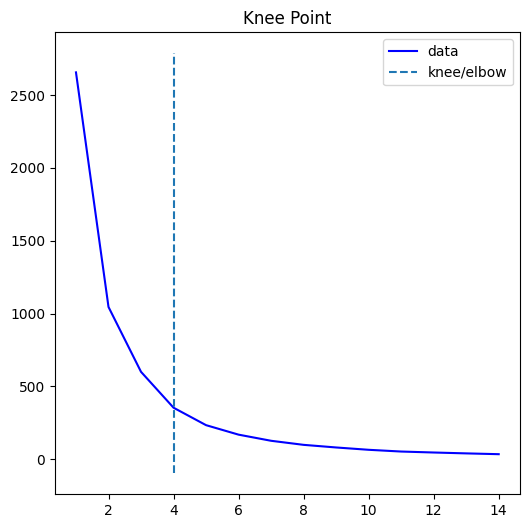

In [6]:
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    sum_of_squared_distances.append(km.inertia_)
kn = KneeLocator(K, sum_of_squared_distances,S=1.0, curve="convex", direction="decreasing")
kn.plot_knee()
#plt.plot(sum_of_squared_distances)

In [7]:
kn.knee

4

In [8]:
kmeans = KMeans(n_clusters= kn.knee).fit(X.reshape(-1,1))
c = kmeans.predict(X.reshape(-1,1))

minmax = []
for i in range(kn.knee):
    minmax.append([-np.inf,np.inf])
for i in range(len(X)):
    cluster = c[i]
    if X[i] > minmax[cluster][0]:
        minmax[cluster][0] = X[i]
    if X[i] < minmax[cluster][1]:
        minmax[cluster][1] = X[i]

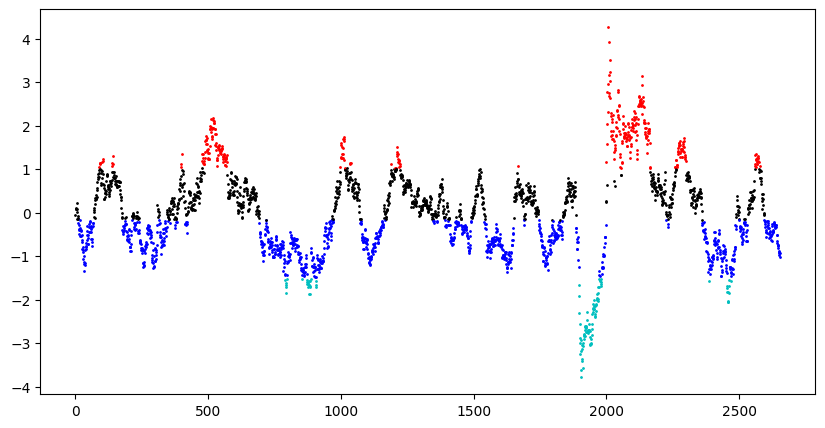

In [27]:
import matplotlib
from matplotlib import pyplot as plt
plt.figure(figsize=(10,5))
for i in range(len(X[:])):
    numbers=[1,2,3,4]
    colors = ['b','k','r','c']
    #3---> red,2----> black,4--->cyan,1--->blue
    c = kmeans.predict(X[i].reshape(-1,1))[0]
    
    color = colors[c]
    plt.scatter(i,X[i],c = color,cmap=matplotlib.colors.ListedColormap(sorted(numbers)),s = 1)
    #plt.scatter(len(X)-1,X[len(X)-1],c='y')